## Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary for Market Segmentation:

* __spending__: Amount spent by the customer per month (in 1000s)
* __advance_payments__: Amount paid by the customer in advance by cash (in 100s)
* __probability_of_full_payment__: Probability of payment done in full by the customer to the bank
* __current_balance__: Balance amount left in the account to make purchases (in 1000s)
* __credit_limit__: Limit of the amount in credit card (10000s)
* __min_payment_amt__ : minimum paid by the customer while making payments for purchases made monthly (in 100s)
* __max_spent_in_single_shopping__: Maximum amount spent in one purchase (in 1000s)

In [1]:
#Loading the necessary Libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Reading the Dataset

#### We will be loading the EDA cars excel file using pandas. For this we will be using read_excel file.

In [2]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

## Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [4]:
print("The total number of rows present in the dataset above is :  ",df.shape[0])
print("The total number of columns/variables present in the dataset above is :  ",df.shape[1])

The total number of rows present in the dataset above is :   210
The total number of columns/variables present in the dataset above is :   7


#### Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The data set has 210 observations and 7 variables in the data set.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### info() is used to check the Information about the data and the datatypes of each respective attributes.
#### We have data for 210 rows with neither any null values nor any missing entries.
#### All columns are numerical

In [6]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

### Check for Duplicate records

In [8]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

#df[dups]

Number of duplicate rows = 0


**Now, we can  clearly see that there are no duplicate records in the data set.**

## Performing Exploratory Data Analysis

### Univariate Analysis

Let us define a function **'univariateAnalysis_numeric'** to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [6]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  7


Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
----------------------------------------------------------------------------


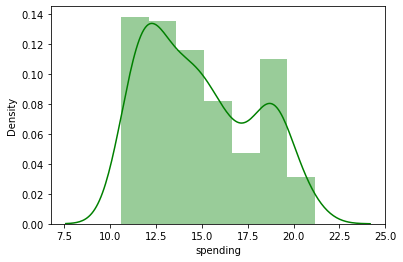

BoxPlot of spending
----------------------------------------------------------------------------


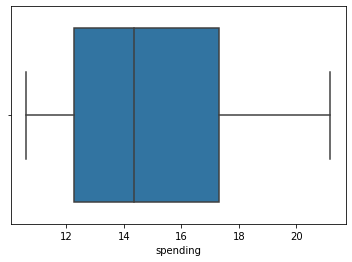

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
----------------------------------------------------------------------------


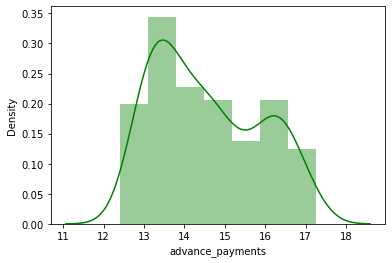

BoxPlot of advance_payments
----------------------------------------------------------------------------


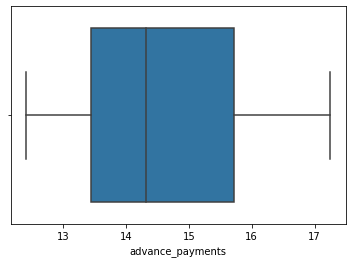

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


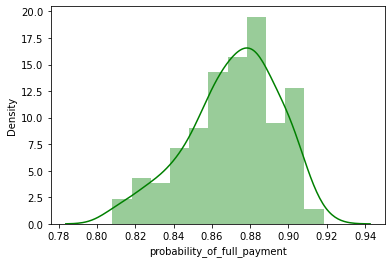

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


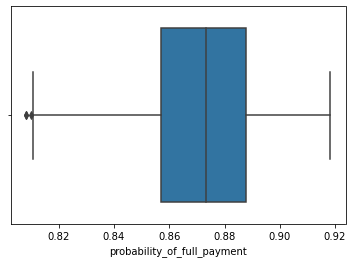

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
----------------------------------------------------------------------------


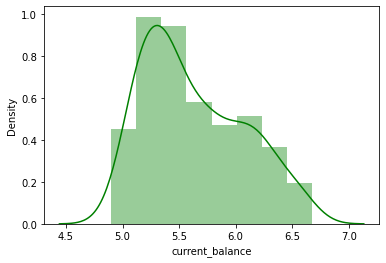

BoxPlot of current_balance
----------------------------------------------------------------------------


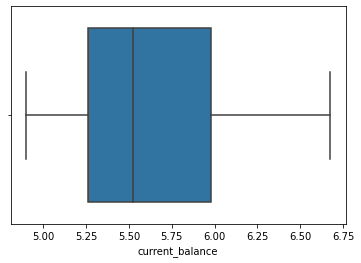

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
----------------------------------------------------------------------------


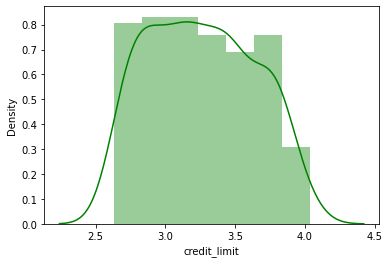

BoxPlot of credit_limit
----------------------------------------------------------------------------


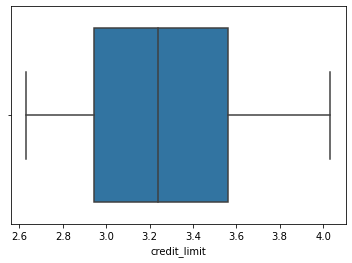

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
----------------------------------------------------------------------------


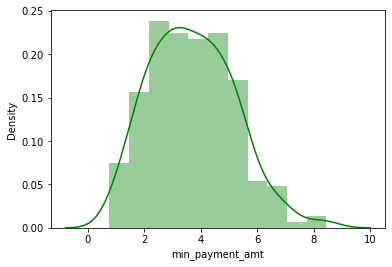

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


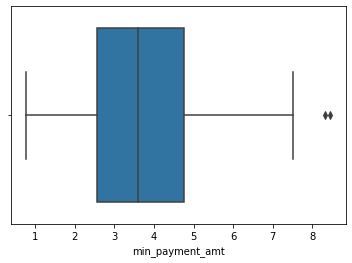

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


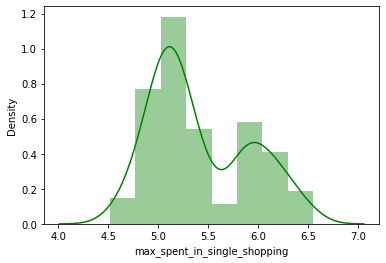

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


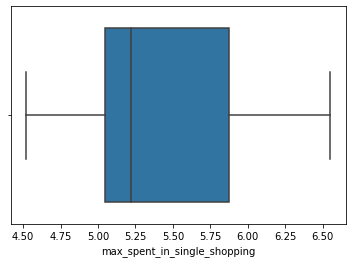

In [8]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

## Bivariate Analysis

### The following Bivariate Analysis will be performed by

* Calculating the correlation between variable for better understanding of how variables are correlated with each other, and
* Calculating the corresponding pairplot.


## Correlation Plot

In [12]:
corr = df_num.corr(method='pearson')

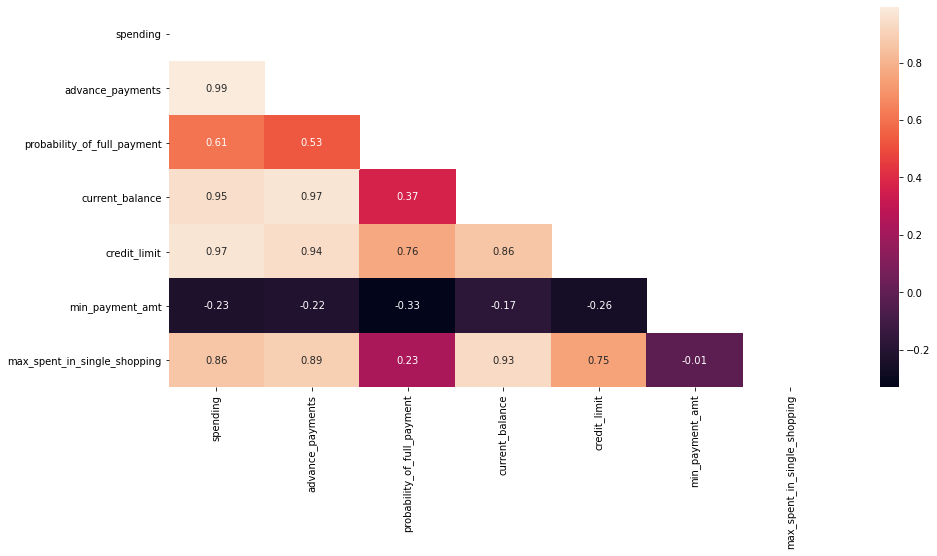

In [13]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15,7))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### There are mostly positive correlations between variables, and very few negative correlations.Overall the magnitude of correlations between the variables are very less.

## Pairplot

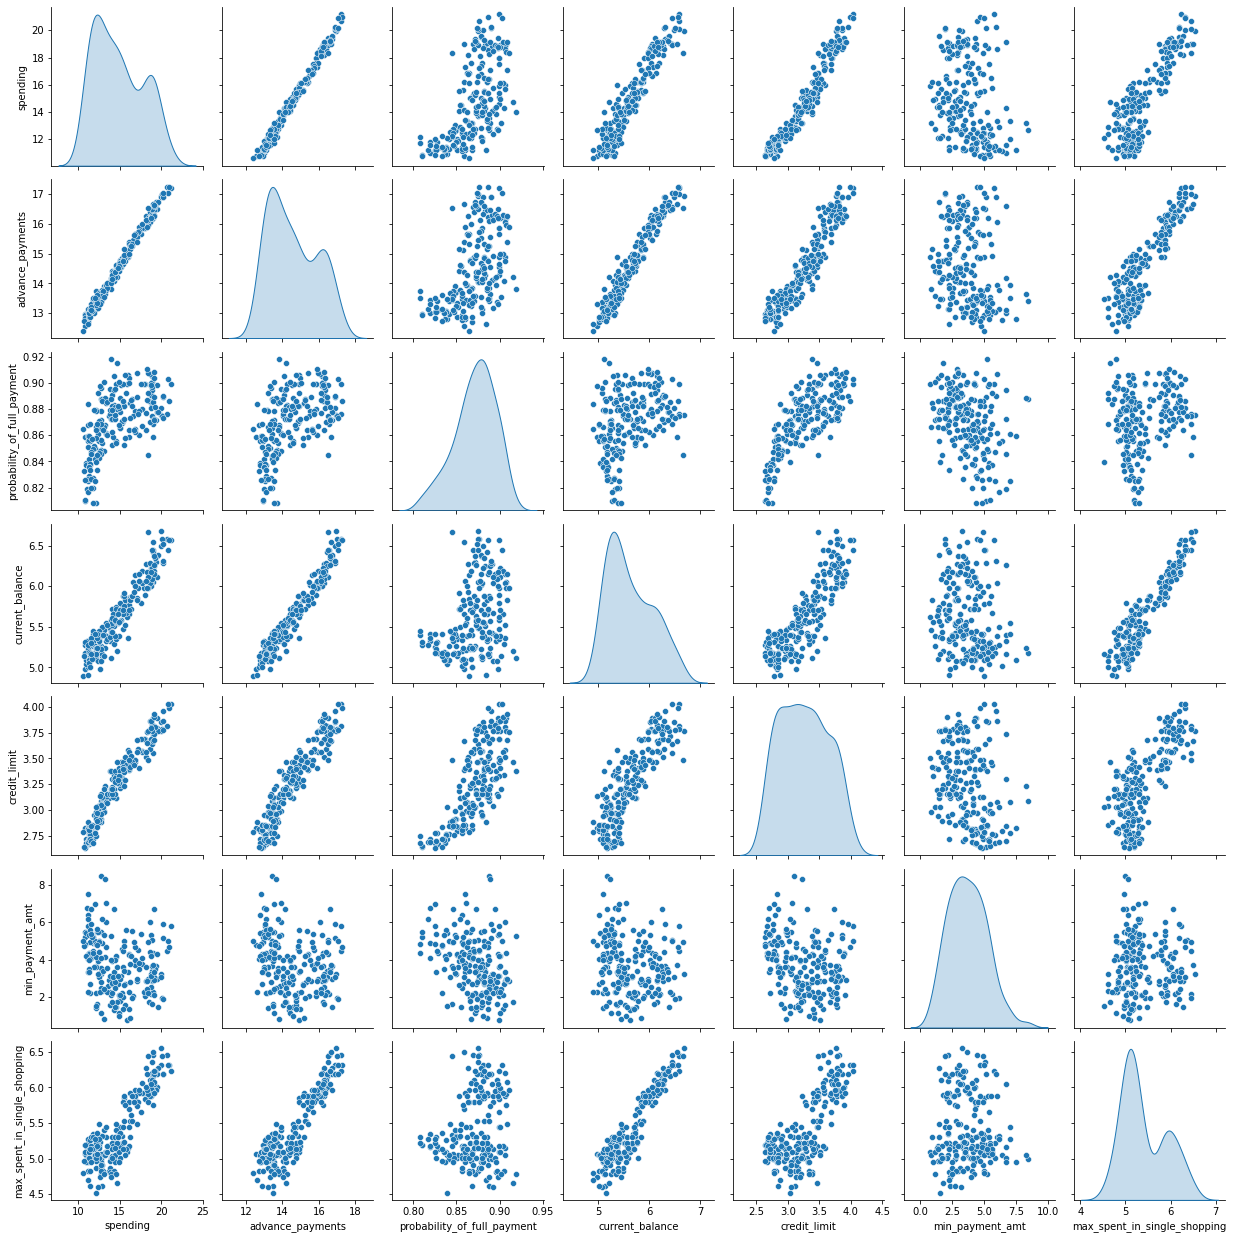

In [14]:
sns.pairplot(df_num,diag_kind='kde');

#### In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

### Checking for Outlier and Outlier Treatment

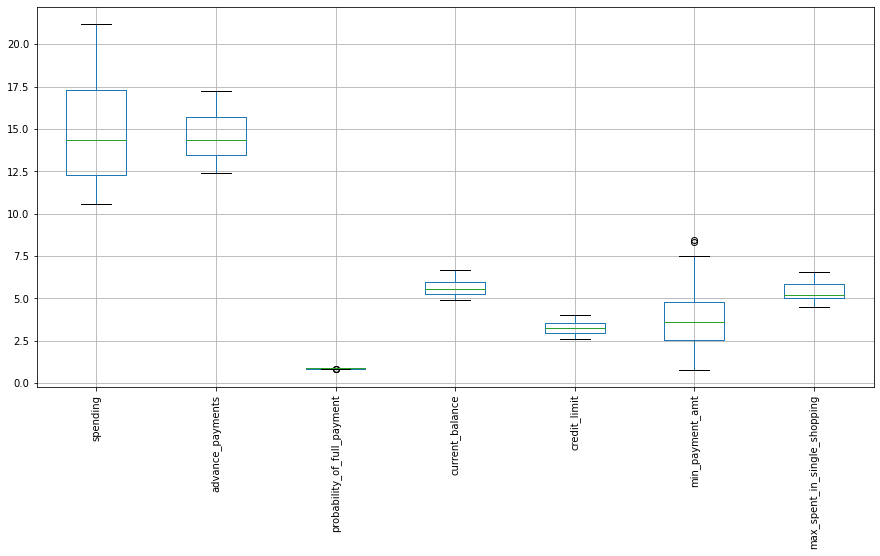

In [15]:
df.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

* As it can be observed, out of the 7 variables, only probability_of_full_payment and min_payment_amt have outlies present in them.
* However they dont seem that significant, therefore we wont treat them until its asked for.

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

**Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our dataset some variables like,spending, current balance, credit limit max spent are having values in thousands, while others are having values in hundreds and probability values which are less than 1 or 100%. Since the data in these variables are of different scales, it is tough to compare these variables.**

**Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.**

**In this method, we convert variables with different scales of measurements into a single scale.**

**StandardScaler normalizes the data using the formula (x-mean)/standard deviation.**

**We will be doing this only for the numerical variables.**

### Scaling the Data

In [16]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [17]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [18]:
scaled_df = pd.DataFrame(X.fit_transform(df),columns=df.columns)

In [19]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [20]:
from scipy.cluster.hierarchy import fcluster

### Choosing Linking Method "average"

In [21]:
link_method = linkage(scaled_df, method = 'average')

### Creating the Dendogram

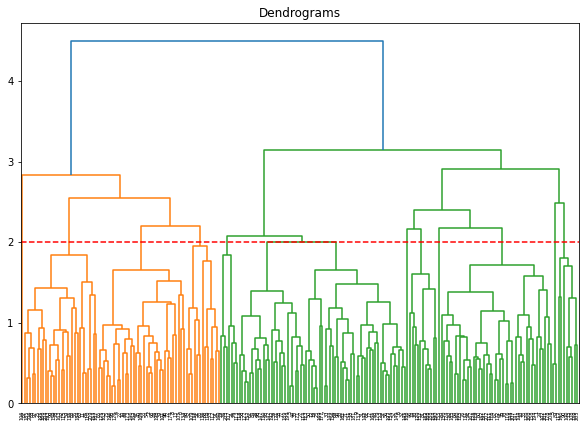

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = dendrogram(link_method)
plt.axhline(y=2, color='r', linestyle='--');

### Cutting the Dendrogram with suitable clusters

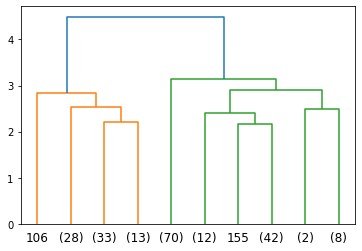

In [23]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                  
                 )

### Creating Clusters Using fcluster

In [24]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

### Concatenating the clusters as a seperate column to our dataset

In [25]:
df['clusters'] = clusters

In [26]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [27]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

### Cluster Profiles

In [28]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


### Choosing method as "ward"

In [29]:
wardlink = linkage(scaled_df, method = 'ward')

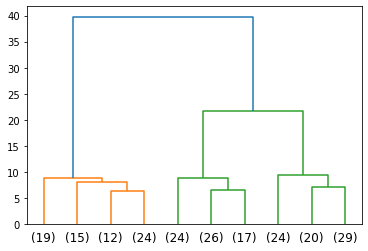

In [30]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [31]:
clusters_ward = fcluster(wardlink, 3, criterion='maxclust')
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [32]:
df.drop(["clusters"],axis=1,inplace=True)
df["Ward_clusters"]=clusters_ward
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Ward_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [33]:
df['Ward_clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: Ward_clusters, dtype: int64

In [34]:
aggdata_w=df.groupby('Ward_clusters').mean()
aggdata_w['Freq']=df['Ward_clusters'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Ward_clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### Perfroming Agglomerative Clustering technique as well to check if any significant variation in clusters is present.

In [35]:
from sklearn.cluster import AgglomerativeClustering

### Clusters

In [36]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(scaled_df)
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


### Analyzing the frequency of the clusters wrt to the dataset.

In [37]:
df["Agglo_CLusters"]=Cluster_agglo

In [38]:
agglo_data=df.drop("Ward_clusters",axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70


## Observation

* Both the method are almost similar with only minor variations, which we know are expected to occur while using different techniques, but it does not affect our data as the difference is not that significantly large.


* Choosing 3 or 4 clusters seems like a better option as only 2 clusters are meaningless and does not portral much information. After further analysis based on the dataset grouping into 3 clusters is a better option using heirarchial clustering.


* Also in real time, there could have been more variables value captured - tenure, balance, purchase but we will not dwell much on that since its not present in the dataset.


* The **'three'** group cluster solution gives a pattern based on high/medium/low spending patterns with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

### Applying k-means technique choosing  3 as the number of clusters with random state=0

In [39]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=0)

In [40]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

### Extracting the labels post clustering

In [41]:
# Get the labels
k_means.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1])

### Calculating the sum of distances between the points and the corresponding centroids for each cluster ranging  from 1 to 10.

In [43]:
wss =[] 

In [44]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [45]:
for i in range(0,10):
    print("WSS value for ",i+1," clusters is = ",wss[i])

WSS value for  1  clusters is =  1469.9999999999998
WSS value for  2  clusters is =  659.171754487041
WSS value for  3  clusters is =  430.6589731513006
WSS value for  4  clusters is =  371.38509060801096
WSS value for  5  clusters is =  327.21278165661346
WSS value for  6  clusters is =  289.31599538959495
WSS value for  7  clusters is =  262.98186570162267
WSS value for  8  clusters is =  241.81894656086033
WSS value for  9  clusters is =  223.91254221002725
WSS value for  10  clusters is =  206.39612184786694


### Elbow-curve for better understanding of the clusters formed.

In [46]:
a=[1,2,3,4,5,6,7,8,9,10]

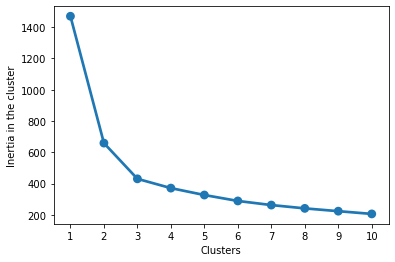

In [47]:
sns.pointplot(a, wss);
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show();

### Calculating silhouette_score for multiple clusters ranging from 2 to 10

In [48]:
from sklearn import metrics

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
# Calculating silhouette_score for multiple clusters
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))
    

In [51]:
for i in range(0,9):
    print("The Silhouette Score/coefficient for ",i+2," clusters is = ",scores[i])

The Silhouette Score/coefficient for  2  clusters is =  0.46577247686580914
The Silhouette Score/coefficient for  3  clusters is =  0.4007270552751299
The Silhouette Score/coefficient for  4  clusters is =  0.3291966792017613
The Silhouette Score/coefficient for  5  clusters is =  0.2878322312678646
The Silhouette Score/coefficient for  6  clusters is =  0.2890450980368358
The Silhouette Score/coefficient for  7  clusters is =  0.2656984649780521
The Silhouette Score/coefficient for  8  clusters is =  0.2701675870182155
The Silhouette Score/coefficient for  9  clusters is =  0.24760490111901076
The Silhouette Score/coefficient for  10  clusters is =  0.2658701603565836


### Visualizing the Silhoutte score values

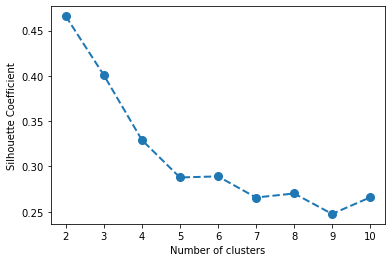

In [52]:
#plotting the sc scores
plt.plot(k_range, scores, marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Cluster Frequency

In [53]:
pd.Series(k_means.labels_).value_counts()

0    72
1    71
2    67
dtype: int64

### Changing the cluster numbering with 1 instead of 0 and adding it to the dataset.

In [54]:
kmeans1_dataset=df.copy()

In [55]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster.T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1
Ward_clusters,1.0,2.1,2.9
Agglo_CLusters,1.0,1.8,0.3


### Cluster Percentage wrt to Cluster Size

In [56]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [57]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [58]:
print ("_____________________K_Means Clusters____________________________________")
kmeans_mean_cluster.T

_____________________K_Means Clusters____________________________________


cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1
Ward_clusters,1.0,2.1,2.9
Agglo_CLusters,1.0,1.8,0.3


In [59]:
print ("_____________________Heirarchial Clustering____________________________________")
aggdata_w.T

_____________________Heirarchial Clustering____________________________________


Ward_clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


## Cluster Group Profiles

### Group 1 : High Spending
### Group 3 : Medium Spending
### Group 2 : Low Spending


### Promotional strategies for each cluster are as follows:-

### Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxury brands, which will drive more one_time_maximun spending

### Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more.

### Group 2 : Low Spending Group
- Customers should be often given reminders for payments. 
* Offers can be provided on early payments to improve their payment rate thus decreasing the default rate as well.
- Increase there spending habits by tieing up with grocery stores, utlities (electricity, phone, gas, others)and other daily essentials and other inexpensive ammenities.





## Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

* 1. Target: Claim Status (**Claimed**)
* 2. Code of tour firm (**Agency_Code**)
* 3. Type of tour insurance firms (**Type**)
* 4. Distribution channel of tour insurance agencies (**Channel**)
* 5. Name of the tour insurance products (**Product**)
* 6. Duration of the tour (**Duration**)
* 7. Destination of the tour (**Destination**)
* 8. Amount of sales of tour insurance policies (**Sales**)
* 9. The commission received for tour insurance firm (**Commission**)
* 10. Age of insured (**Age**)

## Importing the required Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings("ignore")

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Reading the Data

## Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [9]:
df=pd.read_csv("insurance_part2_data.csv")

In [10]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


#### head function will tell you the top records in the data set. By default python shows you only top 5 records.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB



#### info() is used to check the Information about the data and the datatypes of each respective attributes.
## Observation
*  We have data for 3000 rows with neither any null values nor any missing entries.
- 10 variables present, out of which
- Age, Commision, Duration, Sales are numeric in nature, while
- rest are categorial variables
- 9 independent variable and one target variable - Clamied

## Check for missing value in any column

In [64]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## Descriptive Statistics Summary

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


#### The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

### Observation
- Duraction has negetive value which is not possible, therefore deemed as a Wrong entry.

- Mean and Median value varies signficantly with Commision & Sales.

* But CART and RF models treat outliers therefore not removing them manually.
* As for ANN we will scare the data which will remove the outliers.

In [66]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
* For Categorial variables maximun unique count is 5.

## Geting unique counts of all Nominal/Categorical Variables

In [67]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Check for duplicate data

In [68]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


## Duplicates - 
* Not removing the duplicates as we have no unique identifier to .
* Though it shows there are 139 records, but there is no customer ID or any unique identifier to distinguish the customers as it can be different customer, so I am not dropping them off.
### We can say it would be great is we had knowledge of more variables for better understanding of the data.

## Performing Exploratory Data Analysis

### Univariate Analysis

Let us define a function **'univariateAnalysis_numeric'** to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column]);
    plt.show()

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  4


In [14]:
df_cat = df.select_dtypes(include = ['object'])
lstcategoricalcolumns = list(df_cat.columns.values)
print("Total Categorical Columns = ",len(lstcategoricalcolumns))

Total Categorical Columns =  6


### Analysis using Numerical Data

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
----------------------------------------------------------------------------


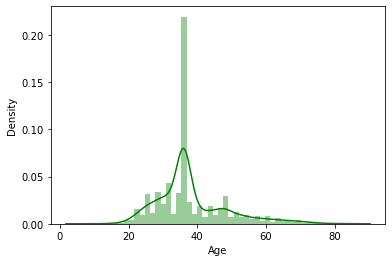

BoxPlot of Age
----------------------------------------------------------------------------


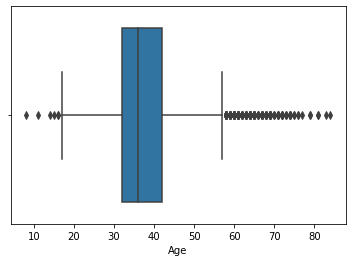

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
----------------------------------------------------------------------------


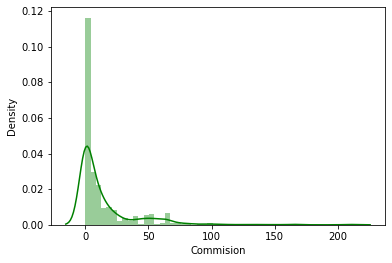

BoxPlot of Commision
----------------------------------------------------------------------------


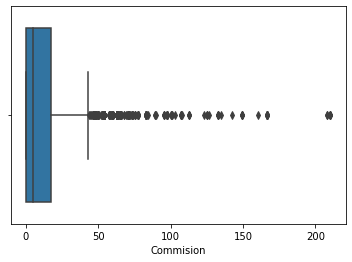

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
----------------------------------------------------------------------------


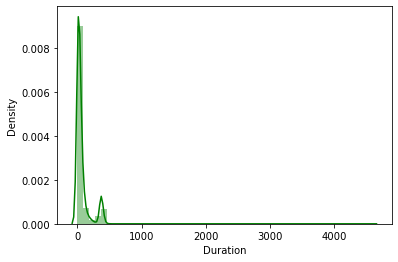

BoxPlot of Duration
----------------------------------------------------------------------------


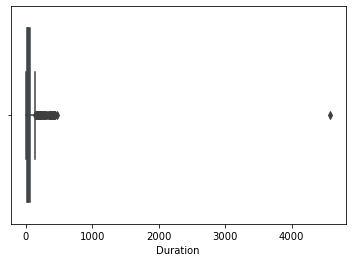

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
----------------------------------------------------------------------------


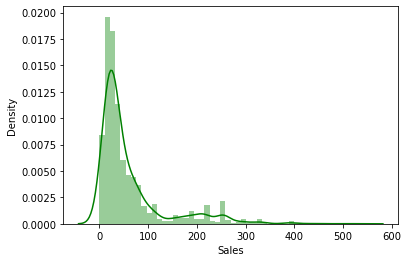

BoxPlot of Sales
----------------------------------------------------------------------------


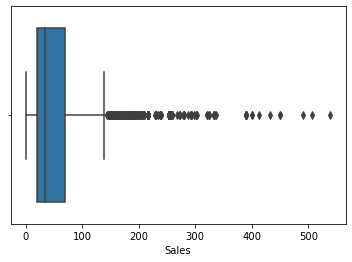

In [15]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

* There are outliers in all the variables, but the sales and commision can be a genuine business value as there can be some exceptional sales and comparative commision received.
* Furthermore, Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.
* We will treat the outliers by scaling the Data for predictions using ANN model.


### Analysis using Categorical Data

In [16]:
def univariateAnalysis_categorical(column,nbins):
  
    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(df[column], color='g');
    plt.show()
    
    plt.figure()
    print("\n")
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column],y=df['Sales'], hue=df['Claimed']);
    plt.show()
    
    plt.figure()
    print("Swarmplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.swarmplot(x=df[column],y=df['Sales'],alpha=0.6);
    plt.show()

Countplot of Agency_Code
----------------------------------------------------------------------------


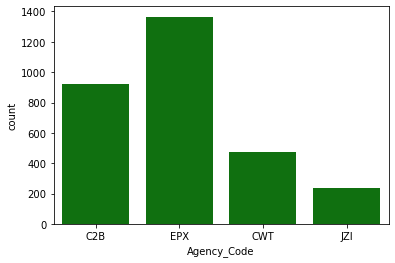



BoxPlot of Agency_Code
----------------------------------------------------------------------------


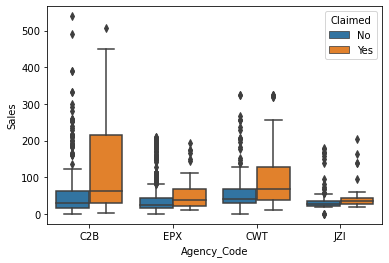

Swarmplot of Agency_Code
----------------------------------------------------------------------------


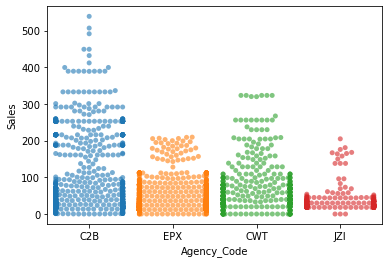

Countplot of Type
----------------------------------------------------------------------------


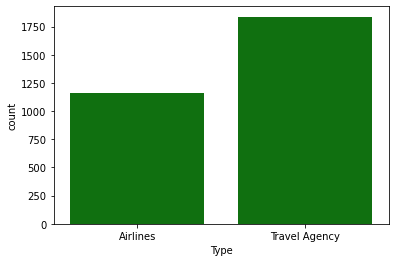



BoxPlot of Type
----------------------------------------------------------------------------


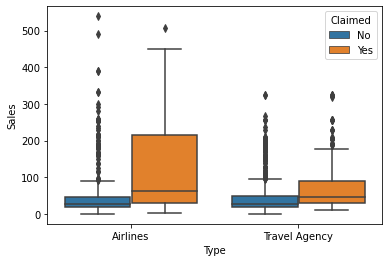

Swarmplot of Type
----------------------------------------------------------------------------


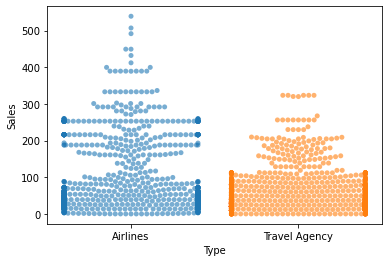

Countplot of Claimed
----------------------------------------------------------------------------


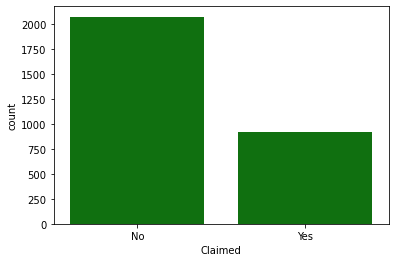



BoxPlot of Claimed
----------------------------------------------------------------------------


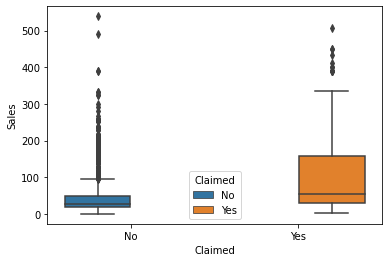

Swarmplot of Claimed
----------------------------------------------------------------------------


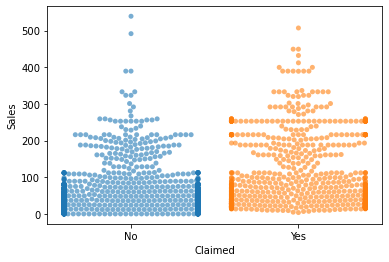

Countplot of Channel
----------------------------------------------------------------------------


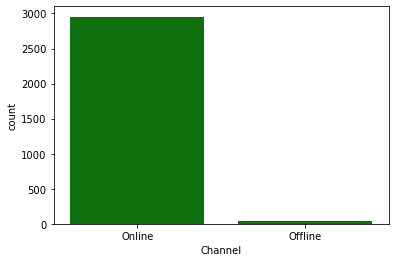



BoxPlot of Channel
----------------------------------------------------------------------------


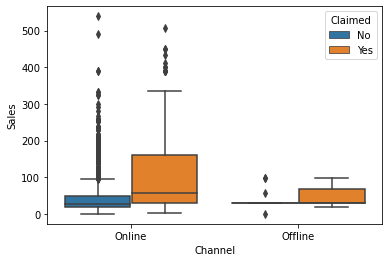

Swarmplot of Channel
----------------------------------------------------------------------------


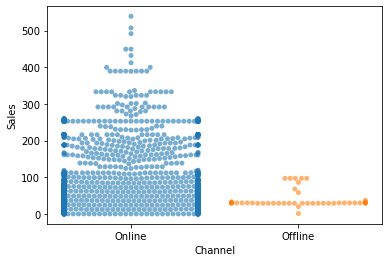

Countplot of Product Name
----------------------------------------------------------------------------


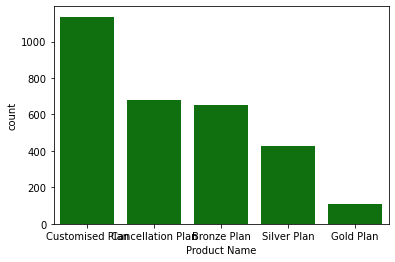



BoxPlot of Product Name
----------------------------------------------------------------------------


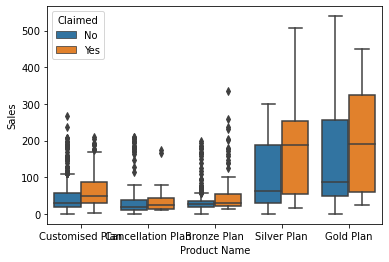

Swarmplot of Product Name
----------------------------------------------------------------------------


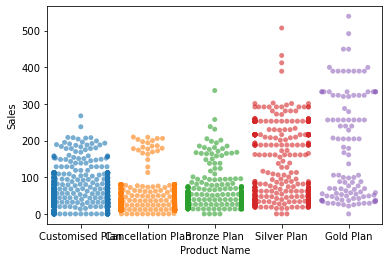

Countplot of Destination
----------------------------------------------------------------------------


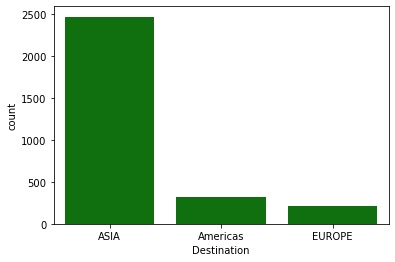



BoxPlot of Destination
----------------------------------------------------------------------------


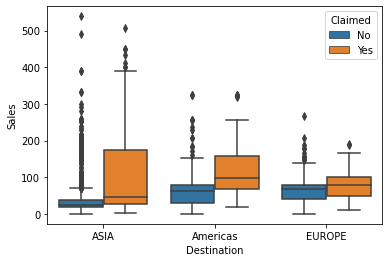

Swarmplot of Destination
----------------------------------------------------------------------------


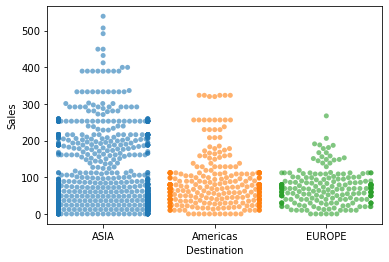

In [17]:
for x in lstcategoricalcolumns:
    univariateAnalysis_categorical(x,20)

## Bivariate Analysis

### The following Bivariate Analysis will be performed by

* Calculating the correlation between variable for better understanding of how variables are correlated with each other, and
* Calculating the corresponding pairplot.

### Checking for Correlations 


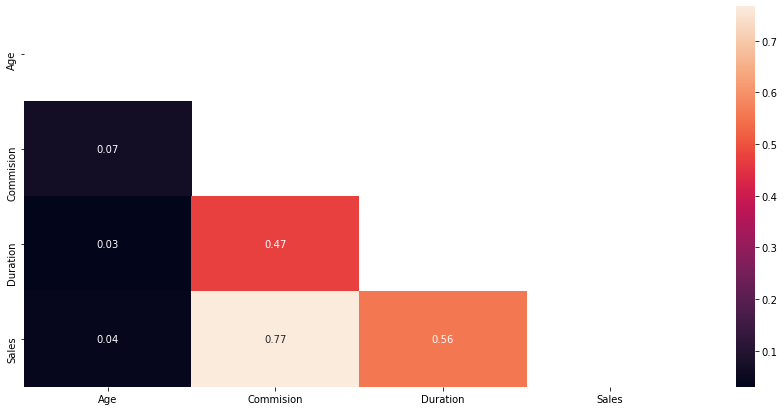

In [75]:
corr = df_num.corr(method="pearson")
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15,7))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Sales and Commision have the highest correlation whereas Age has the Lowest correlation with every variable

### Generating a Pairplot

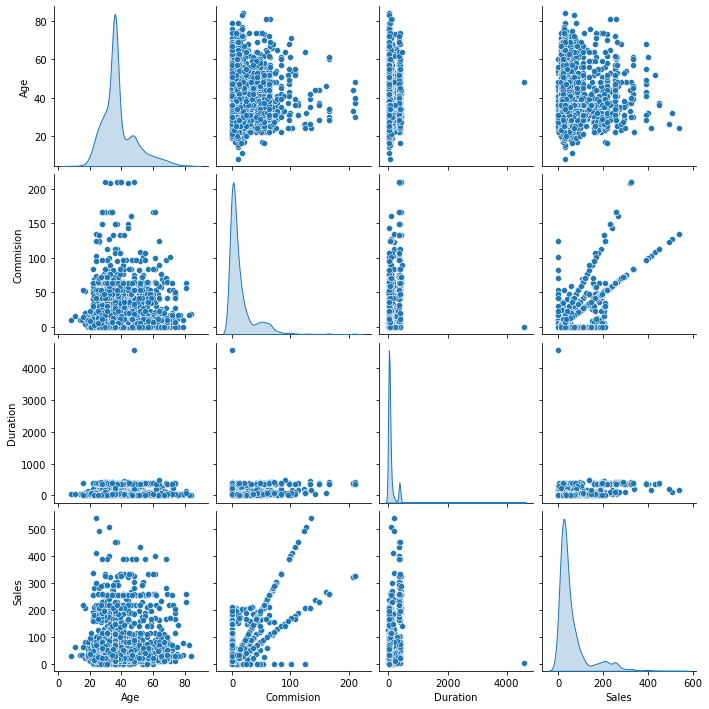

In [76]:
sns.pairplot(df_num,diag_kind="kde");

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**¶

### *Converting all objects to categorical codes and checking the info of the data.

In [77]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


* As we can see all the categorical values are now converted to numerical data.
* The head function below makes it easier to notice the change.

In [79]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportion of 0's and 1's

In [80]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set

In [81]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")
print("______Training Dataset_____")
X.head()

______Training Dataset_____


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


* Since we can observe that in the training dataset, some variable hold more weightage than others, therefore it may affect our observations.
* To prevent this we will perform scaling of the dataset when creating the Neural Network model so that each variable falls under a certain range.


### Splitting data into training and test set


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [84]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


## Building a Decision Tree Classifier (CART)

* Regularizing the decision tree and adding a range of tuning parameters

In [85]:
reg_dt_model = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7,8, 10,12],
    'min_samples_leaf': [20,30,40,50,60], #1-3% of entire rows
    'min_samples_split': [60,90,120,150,180,200],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = reg_dt_model, cv = 3)

In [86]:
grid_search.fit(X_train, train_labels)
print("Best Parameters: ",grid_search.best_params_)
best_grid_dtcl = grid_search.best_estimator_
print("Best Estimator: ",best_grid_dtcl)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 120}
Best Estimator:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=120,
                       random_state=1)


## Generating the tree

In [87]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

### Use the url given below and copy all the data from the dot file created above and paste in the following url to visualize the generated Decision Tree.

* http://www.jdolivet.byethost13.com/Logiciels/WebGraphviz/



## Variable Importance - Decision Tree Classifier

In [88]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.594092
Sales         0.252143
Product Name  0.074957
Duration      0.031694
Age           0.025030
Commision     0.022083
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [89]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

## Extracting the Predicted Classes and Probabilities


In [90]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.983333,0.016667
1,0.394089,0.605911
2,0.394089,0.605911
3,0.154286,0.845714
4,0.928803,0.071197


## Ensemble RandomForest Classifier

### Building the RandomForest Classifier
**Importance of Random State**

**The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split**

In [91]:
param_grid_rfcl = {
    'max_depth': [5,6,7],#8,10
    'max_features': [4,5,6],#7,8
    'min_samples_leaf': [10,15],#20,30
    'min_samples_split': [30,45], #60,90
    'n_estimators': [100,200,300],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [136]:
grid_search_rfcl.fit(X_train, train_labels)
print("Best Parameters: ",grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
print("Best Estimator: ",best_grid_rfcl)

Best Parameters:  {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 200}
Best Estimator:  RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=200, random_state=1)


### Predicting the Training and Testing data

In [93]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

### Getting the Predicted Classes and Probs

In [94]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.742785,0.257215
1,0.455185,0.544815
2,0.422682,0.577318
3,0.260157,0.739843
4,0.938409,0.061591


### Variable Importance -  Random Forest

In [95]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.291965
Product Name  0.192573
Sales         0.179281
Commision     0.129381
Duration      0.083125
Age           0.063843
Type          0.049477
Destination   0.009756
Channel       0.000599


### Building a Neural Network Classifier

* It is important that we scale the data while performing a Neural Network Classifier, this however is not a necessary condition for other models like CART and Random Forest.

* Scaling is done so that each variable holds same weightage in the output so that the model is not affected by one variable having significantly high weights than the others.

* Scaling converts the all the variables in the same scale range.


In [96]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
print("________________________________Scaled Train Dataset__________________________________")
x_train


________________________________Scaled Train Dataset__________________________________


array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [138]:
x_test = sc.transform(X_test)
print("________________________________Scaled Test Dataset__________________________________")
x_test

________________________________Scaled Test Dataset__________________________________


array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

### Performing ANN Classification

In [99]:
param_grid_nncl = {
    'hidden_layer_sizes':  [150,200,300,500], #,[40,50,60,80,100]
    'max_iter': [100,250,500,1000], #,2000,2500,3000,5000
    'solver': ['adam'], 
    'tol': [0.1,0.01,0.001], 
}#

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 5)

In [139]:
grid_search_nncl.fit(x_train, train_labels)
print("Best parameters: " ,grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
print("Best Estimator: ",best_grid_nncl)

Best parameters:  {'hidden_layer_sizes': 500, 'max_iter': 100, 'solver': 'adam', 'tol': 0.001}
Best Estimator:  MLPClassifier(hidden_layer_sizes=500, max_iter=100, random_state=1, tol=0.001)


### Predicting the Training and Testing data

In [101]:
ytrain_predict_nncl = best_grid_nncl.predict(x_train)
ytest_predict_nncl = best_grid_nncl.predict(x_test)

### Getting the Predicted Classes and Probabilities

In [140]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(x_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.932492,0.067508
1,0.553721,0.446279
2,0.555950,0.444050
3,0.293352,0.706648
4,0.942679,0.057321


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### CART Confusion Matrix and Classification Report for the Training data

In [145]:
print("________________Confusion Matrix for Training Dataset_________________")
confusion_matrix(train_labels, ytrain_predict_dtcl)

________________Confusion Matrix for Training Dataset_________________


array([[1307,  164],
       [ 262,  367]], dtype=int64)

In [154]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
print("Accuracy of Training Dataset: ",np.round(cart_train_acc,3))

Accuracy of Training Dataset:  0.797


In [149]:
print("___________________________Classification Report____________________________\n")
print(classification_report(train_labels, ytrain_predict_dtcl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.69      0.58      0.63       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



### Training Data Metrics

In [157]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.58
cart_train_f1  0.63


### CART - AUC and ROC for the Training data

Area Under Curve : 0.837


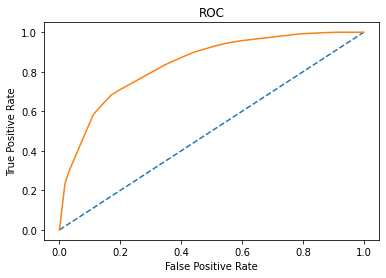

In [182]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('Area Under Curve : %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(cart_train_fpr, cart_train_tpr);

### CART Confusion Matrix and Classification Report for the Testing data

In [150]:
print("________________Confusion Matrix for Testing Dataset_________________")
confusion_matrix(test_labels, ytest_predict_dtcl)

________________Confusion Matrix for Testing Dataset_________________


array([[549,  56],
       [155, 140]], dtype=int64)

In [155]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
print("Accuracy of Testing Data: ",np.round(cart_test_acc,3))

Accuracy of Testing Data:  0.766


In [156]:
print("___________________________Classification Report____________________________\n")
print(classification_report(test_labels, ytest_predict_dtcl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.71      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



### Testing Dataset Metrics

In [112]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.47
cart_test_f1  0.57


### CART -AUC and ROC for the Test data 

Area Under Curve: 0.800


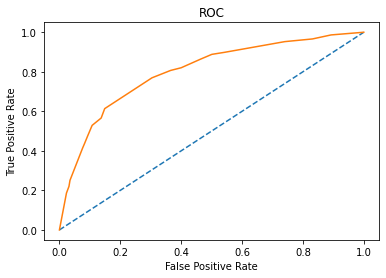

In [181]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('Area Under Curve: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC')
plt.plot(cart_test_fpr, cart_test_tpr);

## CART Conclusion
### Train Data:
- AUC: 83.7%
- Accuracy: 80%
- Precision: 69%
- f1-Score: 63%
- Recall: 58%

### Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 71%
- f1-Score: 57%
- Recall: 47%


* Training and Testing dataset results are almost similar, with the overall measures having high values

* Therefore it is safe to conclude, the model is a good model.



## RandomForest Model Performance Evaluation on Training data

In [158]:
print("________________Confusion Matrix for Training Dataset_________________")
confusion_matrix(train_labels,ytrain_predict_rfcl)

________________Confusion Matrix for Training Dataset_________________


array([[1331,  140],
       [ 243,  386]], dtype=int64)

In [160]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
print("Accuracy of Training Dataset: ",np.round(rf_train_acc,3))

Accuracy of Training Dataset:  0.818


In [161]:
print("___________________________Classification Report____________________________\n")
print(classification_report(train_labels,ytrain_predict_rfcl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1471
           1       0.73      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



### Training Data Metrics

In [116]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.61
rf_train_f1  0.67


### RF- AUC and ROC for the Training data

Area Under Curve: 0.869


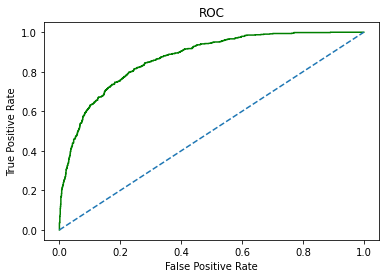

In [169]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area Under Curve: %.3f' % rf_train_auc)

## RF Model Performance Evaluation on Test data

In [159]:
print("________________Confusion Matrix for Testing Dataset_________________")
confusion_matrix(test_labels,ytest_predict_rfcl)

________________Confusion Matrix for Testing Dataset_________________


array([[555,  50],
       [153, 142]], dtype=int64)

In [166]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
print("Accuarcy of Testing Data: ",np.round(rf_test_acc,3))

Accuarcy of Testing Data:  0.774


In [162]:
print("___________________________Classification Report____________________________\n")
print(classification_report(test_labels,ytest_predict_rfcl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       605
           1       0.74      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



### Testing Data Metrics

In [121]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.48
rf_test_f1  0.58


### RF- AUC and ROC for the Testing data

Area under Curve : 0.821


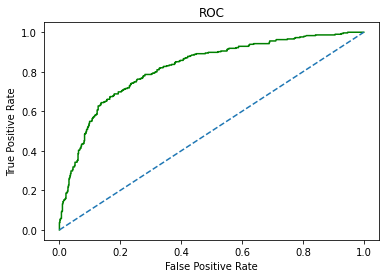

In [170]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve : %.3f'% rf_test_auc)

## Random Forest Conclusion
### Train Data:
- AUC: 87%
- Accuracy: 82%
- Precision: 73%
- f1-Score: 67%
- Recall: 61%

### Test Data:
- AUC: 82%
- Accuracy: 77.4%
- Precision: 74%
- f1-Score: 58%
- Recall: 48%






* Training and Testing dataset results are almost similar, with the overall measures having high values

* Therefore it is safe to conclude, the model is a good model.



## Artificial Neural Network Model Performance Evaluation on Training data

In [171]:
print("________________Confusion Matrix for Training Dataset_________________")
confusion_matrix(train_labels,ytrain_predict_nncl)

________________Confusion Matrix for Training Dataset_________________


array([[1329,  142],
       [ 296,  333]], dtype=int64)

In [178]:
nn_train_acc=best_grid_nncl.score(x_train,train_labels) 
print("Accuracy of Training Data: %.3f" % nn_train_acc)

Accuracy of Training Data: 0.791


In [184]:
print("___________________________Classification Report____________________________\n")
print(classification_report(train_labels,ytrain_predict_nncl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.53      0.60       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



### Training Data Metrics

In [126]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.7
nn_train_recall  0.53
nn_train_f1  0.6


### ANN - AUC and ROC for the Training data

Area Under Curve 0.839


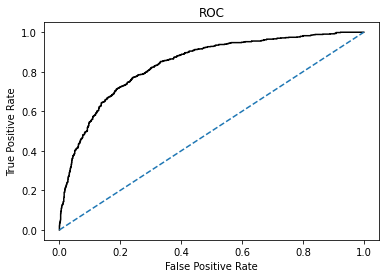

In [180]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
print('Area Under Curve %.3f'% nn_train_auc)

## Artificial Neural Network Model Performance Evaluation on Testing data

In [172]:
print("________________Confusion Matrix for Testing Dataset_________________")
confusion_matrix(test_labels,ytest_predict_nncl)


________________Confusion Matrix for Testing Dataset_________________


array([[555,  50],
       [165, 130]], dtype=int64)

In [183]:
nn_test_acc=best_grid_nncl.score(x_test,test_labels)
print("Accuracy of Testing Dataset: %.3f" % nn_test_acc)

Accuracy of Testing Dataset: 0.761


In [185]:

print("___________________________Classification Report____________________________\n")
print(classification_report(test_labels,ytest_predict_nncl))

___________________________Classification Report____________________________

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



## Testing Data Metrics

In [131]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.72
nn_test_recall  0.44
nn_test_f1  0.55


### ANN - AUC and ROC for the Testing data


Area under Curve 0.815


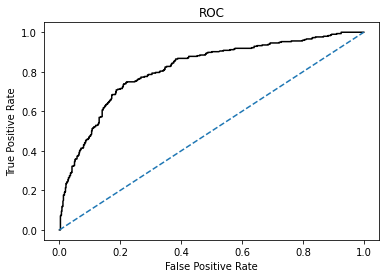

In [186]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
print('Area under Curve %.3f'% nn_test_auc)

## Neural Network Conclusion
### Train Data:
- AUC: 84%
- Accuracy: 79%
- Precision: 70%
- f1-Score: 60%
- Recall: 53%

### Test Data:
- AUC: 81.5%
- Accuracy: 76%
- Precision: 72%
- f1-Score: 55%
- Recall: 44%



* Training and Testing dataset results are almost similar, with the overall measures having high values

* Therefore it is safe to conclude, the model is a good model.

## 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.


## Comparison of the performance metrics from the 3 models


In [133]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.77,0.82,0.77,0.79,0.76
AUC,0.84,0.80,0.87,0.82,0.84,0.81
Recall,0.58,0.47,0.61,0.48,0.53,0.44
Precision,0.69,0.71,0.73,0.74,0.70,0.72
F1 Score,0.63,0.57,0.67,0.58,0.60,0.55


## ROC Curve for the 3 models on the Training data

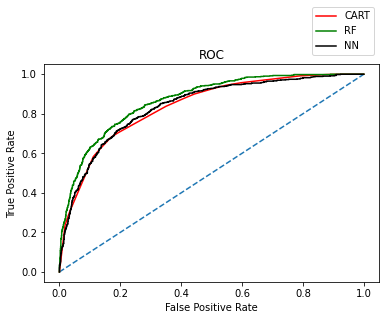

In [187]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

## ROC Curve for the 3 models on the Test data


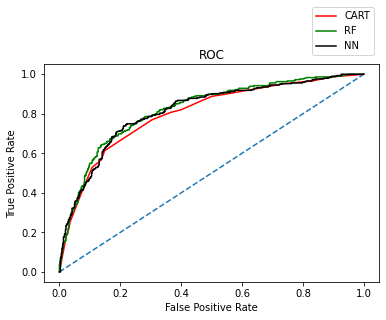

In [188]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

## CONCLUSION :

### * All of the three models are performing very good having high accuracy, AUC and precision values.
### * Random Forest model is the one which is performing the best as compared to CART and ANN therefore that is the model we will use for better predictions. 
### * This can also be oberved from the ROC curves of all 3 models.


## 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

* I strongly recommended we collect more real time unstructured data and past data if possible.


* This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc., we can grad more insights from the data leading to better predictions hence improving the accuracy and precision of the model.


* • Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?


* Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.

# By: Tushar Babbar